In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import fitsio
import scipy.stats #import kstest

In [2]:
tile_entropy = []
tile_id = []
petal_id = []
for i in range(1,7):
    filename = "summary_rr_entropy_daily_{}.csv".format(20220300+i)
    try:
        data = pd.read_csv(filename)
        tile_entropy += list(data['H'])
        tile_id += list(data['TILEID'])
        petal_id += list(data['PETALID'])
    except:
        pass
tile_entropy = np.array(tile_entropy)
tile_id = np.array(tile_id)
petal_id = np.array(petal_id)

In [3]:
#data = pd.read_csv("summary_rr_entropy_daily.csv")
#tile_entropy = data["H_TILE"]
#tile_id = data["TILEID"]

870


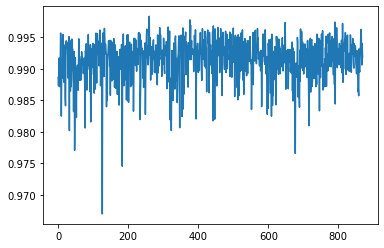

In [4]:
plt.plot(tile_entropy)
print(len(np.unique(tile_entropy)))

In [5]:
print(tile_id[tile_entropy<0.980])
print(petal_id[tile_entropy<0.980])

[3935 2838 8944 4229]
[7 6 3 7]


In [6]:
ii = np.argsort(tile_entropy)
sorted_tiles = tile_id[ii]

In [9]:
for i in range(100):
    print(sorted_tiles[i], tile_entropy[ii[i]])

2838 0.96694364797774
8944 0.9745218943544002
4229 0.9765623605890812
3935 0.9770400239543844
2365 0.9801904121880508
11774 0.980191579700707
1592 0.9805840188130268
21555 0.9806326760415645
7375 0.9809515515373898
10811 0.9815477096879276
21575 0.9817241743193476
43020 0.9819034921159088
26110 0.9819257691134928
21575 0.9819828243933586
42737 0.9820199617675962
4105 0.9822596963488348
43025 0.9824017369576428
5780 0.9824595402001554
4080 0.9824787942149156
9931 0.9827528104973592
5818 0.9827660984624113
3935 0.9832008685366358
10850 0.9832555628946776
9927 0.98330708893461
26214 0.9835273531564004
43025 0.9835957290037716
5818 0.9836953064504176
7256 0.9838883966101218
24613 0.9839690449409898
41292 0.9839914382017784
2558 0.9841157115251408
6206 0.9841737389570436
8924 0.9842233432107867
5248 0.9842680373515524
21373 0.9844017726239956
21555 0.984615502126336
7731 0.9846825020682334
4229 0.9848727295452332
7080 0.98488989812659
11774 0.9849753295139853
3935 0.9850160564695972
8829 0.

In [10]:
tile_id = 4229
tile_id = 7256
#tile_id = 4408
#tile_id = 6206
tile_id = 2848
release = "daily"
release_path = "/global/cfs/cdirs/desi/spectro/redux/{}/".format(release)
search_path = "{}/tiles/cumulative/{}/*/redrock-*-{}-thru*.fits".format(release_path, tile_id, tile_id)
z_in_petal = {}
for petal_id in range(10):
    search_path = "{}/tiles/cumulative/{}/*/redrock-*-{}-thru*.fits".format(release_path, tile_id, tile_id)
    print(search_path)
    try:
        file_in = glob.glob(search_path)[0]
        this_petal_id = file_in.split('/')[-1].split('-')[-3]
        tile_file = file_in.replace("redrock-{}".format(this_petal_id), "redrock-{}".format(petal_id))
        print(tile_file)
        try:
            z_tile_per_exp = fitsio.read(tile_file, ext="REDSHIFTS")
            fmap_tile_per_exp = fitsio.read(tile_file, ext="FIBERMAP")
            exp_fmap_tile_per_exp = fitsio.read(tile_file, ext="EXP_FIBERMAP")
        except:
            pass
        try:
            ii = (z_tile_per_exp['ZWARN']==0) #& (exp_fmap_tile_per_exp['FIBERSTATUS']==0)
            n_good_z = np.count_nonzero(ii)
            #all_good_z += list(z_tile_per_exp['Z'][ii])
            z_in_petal[petal_id] = z_tile_per_exp['Z'][ii]
        except:
            pass
    except:
        pass

/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/2848/*/redrock-*-2848-thru*.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/2848/20220306/redrock-0-2848-thru20220306.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/2848/*/redrock-*-2848-thru*.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/2848/20220306/redrock-1-2848-thru20220306.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/2848/*/redrock-*-2848-thru*.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/2848/20220306/redrock-2-2848-thru20220306.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/2848/*/redrock-*-2848-thru*.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/2848/20220306/redrock-3-2848-thru20220306.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/2848/*/redrock-*-2848-thru*.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/2848/20220306/redrock-4-2848-thru2022

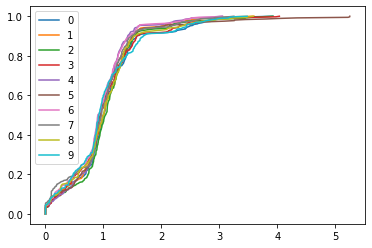

In [15]:
for i in z_in_petal.keys():
    z = z_in_petal[i]
    z = np.sort(z)
    n = len(z)
    cdf = np.linspace(0,1,n)
    plt.plot(z,cdf, label='{}'.format(i))
plt.legend()

In [16]:
p_value_results = np.ones((10,10))
for i in range(10):
    for j in range(10):
        p_value_results[i,j] = scipy.stats.kstest(z_in_petal[i],z_in_petal[j])[1]

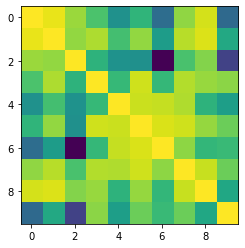

In [17]:
plt.imshow(np.log10(p_value_results))

In [18]:
print(p_value_results[p_value_results<0.001], np.min(p_value_results))

[0.00038641 0.00038641] 0.000386409857443093


In [19]:
p_value_results[7,:]

array([0.26713988, 0.43392963, 0.10439296, 0.40799937, 0.3936134 ,
       0.56829518, 0.26221752, 1.        , 0.51945756, 0.1692273 ])